# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [1]:
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


In [2]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_EXCEL = DIR_DATA/"RW-Health-Data.xlsx"

# Population by cell for Rwanda
FILE_POP_RW = DIR_DATA/"rwa-cell-pop.csv"
# Nighttime lights for Rwanda
FILE_NTL_RW = DIR_DATA/"cell-ntl-2015-2020-2024.csv"


# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)

## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

In [3]:
#Read survey names
survey_names = pd.ExcelFile(FILE_EXCEL).sheet_names
survey_names

['dhs-mobile_subnational_rwa',
 'access-to-health-care_subnation',
 'child-mortality-rates_subnation',
 'covid-19-prevention_subnational',
 'dhs-quickstats_subnational_rwa',
 'fertility-rates_subnational_rwa',
 'health-insurance_subnational_rw',
 'immunization_subnational_rwa',
 'mens-fertility-and-family-plann',
 'symptoms-of-acute-respiratory-i']

# Task 1 

In [4]:
#surveys dataset reading 
surveys=[]
for survey in survey_names:
    #Read each survey sheet, skipping the second row
    df=pd.read_excel(FILE_EXCEL,sheet_name=survey,skiprows=[1])
    #aggregating each indicator by year using mean
    df=df.groupby(['Indicator','SurveyYear']).agg({'Value':'mean'}).reset_index()
    #Include the survey name and aggregation method
    df['survey_name']=survey
    df['aggregation_method']='mean'
    #Rename columns for clarity as indicated
    df.rename(columns={'Indicator':'indicator_name','Value':'aggregated_value','SurveyYear':'indicator_year',},inplace=True)
    surveys.append(df)
    
# Concatenate all surveys data into one DataFrame
df_all = pd.concat(surveys, ignore_index=True)

df_all.to_csv(DIR_DATA/"aggregated_national_health_indicators.csv", index=False)
print("the Size of the dataframe is: ",df_all.shape)
df_all.sample(10)


the Size of the dataframe is:  (1850, 5)


,indicator_name,indicator_year,aggregated_value,survey_name,aggregation_method
1381,Total fertility rate 15-49,2008,5.380000,dhs-quickstats_subnational_rwa,mean
790,Delivery by cesarean section,2005,3.866667,access-to-health-care_subnation,mean
1066,Child mortality rate,2010,40.800000,child-mortality-rates_subnation,mean
1667,Knowledge of any method of contraception among...,2000,99.782353,mens-fertility-and-family-plann,mean
336,Median age at first marriage [Women]: 25-49,2000,20.670588,dhs-mobile_subnational_rwa,mean
408,Mother's first postnatal checkup in the first ...,2010,18.660000,dhs-mobile_subnational_rwa,mean
39,Child mortality rate,1992,81.357143,dhs-mobile_subnational_rwa,mean
507,Total fertility rate 15-49,2008,5.380000,dhs-mobile_subnational_rwa,mean
550,Wife beating justified for at least one specif...,2019,49.060000,dhs-mobile_subnational_rwa,mean
850,Number of children with symptoms of ARI born i...,2005,232.300000,access-to-health-care_subnation,mean


# Task 2

In [5]:
#surveys dataset reading 
surveys=[]
for survey in survey_names:
    #Read each survey sheet, skipping the second row
    df=pd.read_excel(FILE_EXCEL,sheet_name=survey,skiprows=[1])
    #aggregating each indicator by year using mean
    df=df.groupby(['Location','Indicator','SurveyYear']).agg({'Value':'mean'}).reset_index()
    #Include the survey name and aggregation method
    df['survey_name']=survey
    df['aggregation_method']='mean'
    #Rename columns for clarity as indicated
    df.rename(columns={'Indicator':'indicator_name','Value':'aggregated_value','SurveyYear':'indicator_year',},inplace=True)
    surveys.append(df)
    
# Concatenate all surveys data into one DataFrame
df_all = pd.concat(surveys, ignore_index=True)
df_all.to_csv(DIR_DATA/"aggregated_subnational_health_indicators.csv", index=False)
print("the Size of the dataframe is: ",df_all.shape)
df_all.sample(10)

the Size of the dataframe is:  (13348, 6)


,Location,indicator_name,indicator_year,aggregated_value,survey_name,aggregation_method
5316,Gikongoro,Number of children with symptoms of ARI born i...,2000,102.500000,access-to-health-care_subnation,mean
9476,Gisenyi,Women with secondary or higher education,1992,4.200000,dhs-quickstats_subnational_rwa,mean
8724,North,Population with a place for handwashing was ob...,2015,7.200000,covid-19-prevention_subnational,mean
3979,West,Feeding practices during diarrhea: ORT and con...,2015,9.450000,dhs-mobile_subnational_rwa,mean
8389,Gitarama,Population using open defecation,2000,3.300000,covid-19-prevention_subnational,mean
5358,Gikongoro,Treatment of diarrhea: Oral rehydration soluti...,2000,7.500000,access-to-health-care_subnation,mean
12542,Kigali Prefecture 1992,Recent sexual activity [Men]: Never had sex,2000,32.000000,mens-fertility-and-family-plann,mean
836,East,DPT 3 vaccination received,2015,98.000000,dhs-mobile_subnational_rwa,mean
5789,Kibuye/Ruhengeri/Gisenyi,Assistance during delivery: Nurse/midwife,1992,17.733333,access-to-health-care_subnation,mean
11364,Gitarama,DPT 3 vaccination received,1992,90.400000,immunization_subnational_rwa,mean


## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column. 

## Part B: Exploratory Data Analysis

### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions

In [6]:
#Read the dataset
population_df=pd.read_csv(FILE_POP_RW)
#Display the first few rows of the dataframe
population_df.head()

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0


Create required variables for population dataset

In [7]:
#compute working_age_population variable
population_df['working_age_population']=population_df['general_2020']-(population_df['children_under_five_2020']+population_df['elderly_60_plus_2020'])
#compute dependency_ratio variables
population_df['dependency_ratio']=(population_df['children_under_five_2020']+population_df['elderly_60_plus_2020'])/population_df['working_age_population']*100
# Compute people_per_building variable(Taking building_count=0 into consideration to avoid division by zero)
population_df['people_per_building'] = population_df.apply(
    lambda row: row['general_2020'] / row['building_count'] if row['building_count'] != 0 else 0,
    axis=1
)


# Higher people_per_building and higher dependency_ratio both indicate more strain on infrastructure.
# We need to standardize both of them first and sum them to get  the infrastructure index.

#Standardizing the variables
scaler = StandardScaler()
population_df[['ppb_scaled', 'dr_scaled']] = scaler.fit_transform(
    population_df[['people_per_building', 'dependency_ratio']]
)
# Compute infrastructure_index
population_df['infrastructure_index'] = population_df['ppb_scaled'] + population_df['dr_scaled']



# Explanation:
- people_per_building: More people per building suggests crowded housing and greater infrastructure demand.
- dependency_ratio: Higher dependency means more non-working people relying on infrastructure/services.
- Standardizing allows combining variables on different scales.
- Summing the z-scores gives an index where higher values = higher infrastructure pressure.

In [8]:
#Read nightlight dataset
nightlights_df=pd.read_csv(FILE_NTL_RW)
#Display the first few rows of the dataframe
nightlights_df.head()

,cell_id,prov_name,dist_name,sect_name,province_name,district_name,sector_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,6.994746,0.099925,0.0,0.300291,0.0,0.130675,70,26,2020,37.142857
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,7.167736,0.113774,0.0,0.307715,0.0,0.131960,63,27,2020,42.857143
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143


In [9]:
nightlights_df.columns
#Drop

Index(['cell_id', 'prov_name', 'dist_name', 'sect_name', 'province_name',
       'district_name', 'sector_name', 'cell_name', 'total_nightlight',
       'mean_nightlight', 'median_nightlight', 'max_nightlight',
       'min_nightlight', 'std_nightlight', 'pixel_count', 'lit_pixel_count',
       'year', 'lit_pixel_percentage'],
      dtype='object')

Create new variables for nightlight dataset

In [10]:
# Get 2015 and 2024 values per cell
change_df = nightlights_df[nightlights_df["year"].isin([2015, 2024])].pivot(
    index="cell_id", columns="year", values=["total_nightlight","mean_nightlight"]
)

# Compute % change from 2015 to 2024 for both total and mean nightlight
change_df["total_nightlight_change_2015_2024"] = ((change_df["total_nightlight", 2024] - change_df["total_nightlight", 2015]) / change_df["total_nightlight", 2015]) * 100
change_df["mean_nightlight_change_2015_2024"] = ((change_df["mean_nightlight", 2024] - change_df["mean_nightlight", 2015]) / change_df["mean_nightlight", 2015]) * 100
change_df.head()

# Merge back to original long dataframe
nightlights_df = nightlights_df.merge(change_df["total_nightlight_change_2015_2024"], on="cell_id", how="left")
nightlights_df = nightlights_df.merge(change_df["mean_nightlight_change_2015_2024"], on="cell_id", how="left")
nightlights_df.head()

,cell_id,prov_name,dist_name,sect_name,province_name,district_name,sector_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage,total_nightlight_change_2015_2024,mean_nightlight_change_2015_2024
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,6.994746,0.099925,0.0,0.300291,0.0,0.130675,70,26,2020,37.142857,510.862720,510.862733
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857,510.862720,510.862733
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857,510.862720,510.862733
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,7.167736,0.113774,0.0,0.307715,0.0,0.131960,63,27,2020,42.857143,601.012355,601.012330
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Unknown_Province,Unknown_District,Unknown_Sector,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143,601.012355,601.012330


Merge both population and nightlight datasets 

In [11]:
#Drop existing province_name,district_name,sector_name and  rename prov_name,dist_name,sect_name to province_name,district_name,sector_name respectively
nightlights_df.drop(columns=['province_name','district_name','sector_name'],inplace=True)
nightlights_df.rename(columns={'prov_name':'province_name','dist_name':'district_name','sect_name':'sector_name'},inplace=True)
nightlights_df.head()

,cell_id,province_name,district_name,sector_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage,total_nightlight_change_2015_2024,mean_nightlight_change_2015_2024
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,6.994746,0.099925,0.0,0.300291,0.0,0.130675,70,26,2020,37.142857,510.862720,510.862733
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857,510.862720,510.862733
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857,510.862720,510.862733
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,7.167736,0.113774,0.0,0.307715,0.0,0.131960,63,27,2020,42.857143,601.012355,601.012330
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143,601.012355,601.012330


In [12]:
#Merge population and nightlight datasets on cell_id,province_name,district_name ,sector_name and cell_name

merged_df = pd.merge(population_df, nightlights_df, on=["cell_id","province_name","district_name","sector_name","cell_name"], how="inner")
merged_df.head(10)

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,...,median_nightlight,max_nightlight,min_nightlight,std_nightlight,pixel_count,lit_pixel_count,year,lit_pixel_percentage,total_nightlight_change_2015_2024,mean_nightlight_change_2015_2024
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,...,0.0,0.300291,0.0,0.130675,70,26,2020,37.142857,510.862720,510.862733
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,...,0.0,0.586523,0.0,0.218413,70,26,2024,37.142857,510.862720,510.862733
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,...,0.0,0.142328,0.0,0.038462,70,26,2015,37.142857,510.862720,510.862733
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,...,0.0,0.307715,0.0,0.131960,63,27,2020,42.857143,601.012355,601.012330
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,...,0.0,0.463222,0.0,0.198171,63,27,2024,42.857143,601.012355,601.012330
5,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,...,0.0,0.105445,0.0,0.030171,63,27,2015,42.857143,601.012355,601.012330
6,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,...,0.0,0.293333,0.0,0.129459,60,26,2020,43.333333,599.043610,599.043614
7,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,...,0.0,0.430385,0.0,0.193181,60,26,2024,43.333333,599.043610,599.043614
8,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,...,0.0,0.086475,0.0,0.029466,60,26,2015,43.333333,599.043610,599.043614
9,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,...,0.0,0.300679,0.0,0.128697,99,43,2020,43.434343,534.552323,534.552310


In [13]:
merged_df.columns

Index(['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name',
       'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020',
       'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count',
       'working_age_population', 'dependency_ratio', 'people_per_building',
       'ppb_scaled', 'dr_scaled', 'infrastructure_index', 'total_nightlight',
       'mean_nightlight', 'median_nightlight', 'max_nightlight',
       'min_nightlight', 'std_nightlight', 'pixel_count', 'lit_pixel_count',
       'year', 'lit_pixel_percentage', 'total_nightlight_change_2015_2024',
       'mean_nightlight_change_2015_2024'],
      dtype='object')

## Part B

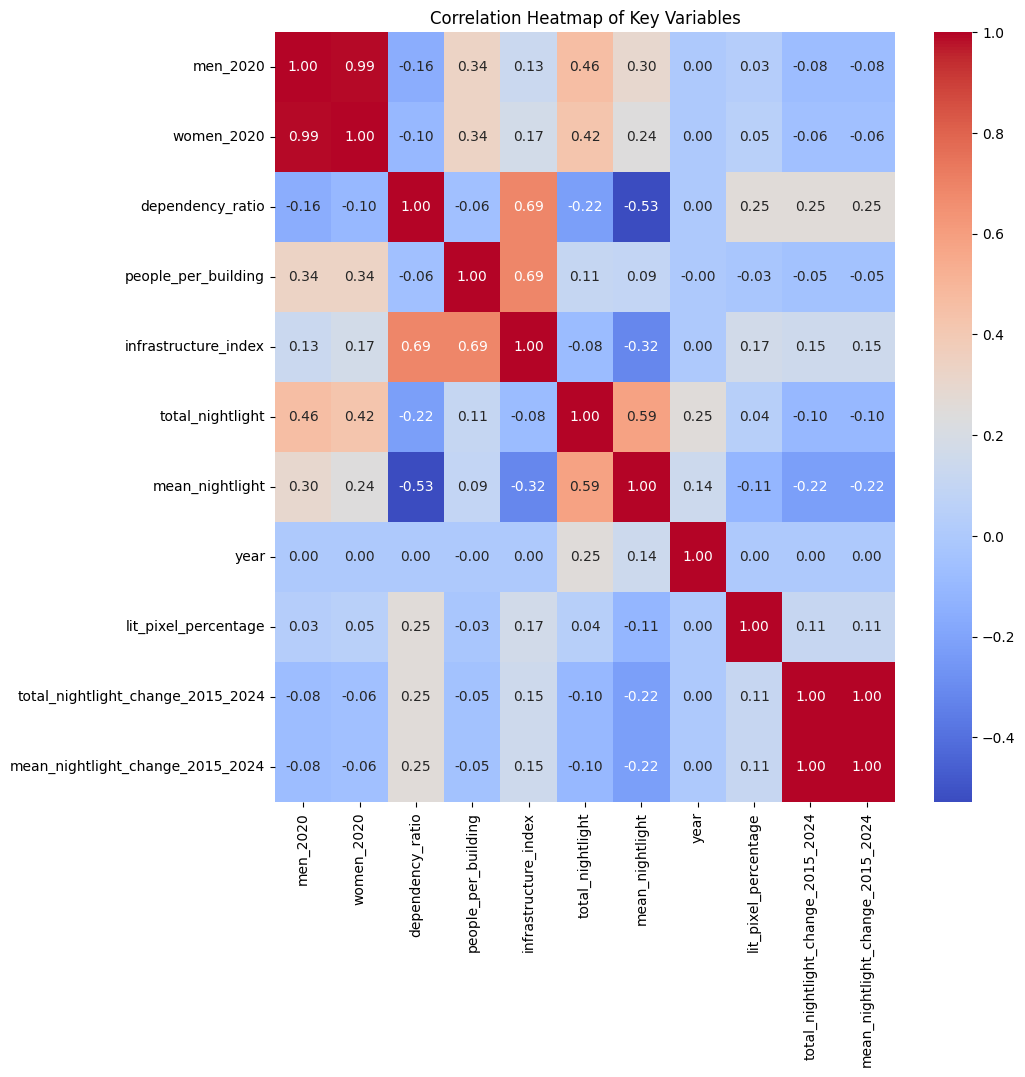

In [24]:
#correlation heatmap showing the correlations between 10key variables in the merged dataset(demographic, infrastructure and nightlight variable represented)
corr = merged_df[[
      
     'men_2020', 'women_2020', 'dependency_ratio', 'people_per_building',
       'infrastructure_index', 'total_nightlight',
       'mean_nightlight',
       'year', 'lit_pixel_percentage', 'total_nightlight_change_2015_2024',
       'mean_nightlight_change_2015_2024']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Key Variables')
plt.show()  

In [25]:
# Compute correlation matrix480.762219	
corr = merged_df[[
       'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020',
       'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count',
       'working_age_population', 'dependency_ratio', 'people_per_building',
      'infrastructure_index', 'total_nightlight',
       'mean_nightlight', 'median_nightlight', 'max_nightlight',
       'min_nightlight', 'std_nightlight', 'pixel_count', 'lit_pixel_count',
       'year', 'lit_pixel_percentage', 'total_nightlight_change_2015_2024',
       'mean_nightlight_change_2015_2024']].corr()

# Unstack and reset index to get pairs
corr_pairs = corr.abs().unstack().reset_index()
corr_pairs.columns = ['var1', 'var2', 'correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['var1'] != corr_pairs['var2']]

# Treat (A, B) and (B, A) as the same pair
corr_pairs['pair'] = corr_pairs.apply(lambda x: tuple(sorted([x['var1'], x['var2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates('pair')

# Sort by correlation descending and show top 3
top3 = corr_pairs.sort_values('correlation', ascending=False).head(3)
top3[['var1', 'var2', 'correlation']]

,var1,var2,correlation
505,total_nightlight_change_2015_2024,mean_nightlight_change_2015_2024,1.000000
30,general_2020,working_age_population,0.998883
99,men_2020,working_age_population,0.998559


The top correlated pairs are:
1. **total_nightlight_change_2015_2024 and mean_nightlight_change_2015_2024**: which make sense as the total and mean  of a record can easily change in the same way in both years,
2. **general_2020 and working_age_population**:the more the population increase, the working age population increase as well
3. **men_2020 and working_age_population**:This can mean that among the population grow, a big number is male thus it increase with the work populations as well.

The unexpected correlation here is the correlation between women and men. The explanation could be that not all people were used in these dataset instead samples were used where they have considered equalizing the numbers 

In [26]:
# Group by district and get the max total_nightlight_change_2015_2024 for each district
district_with_high_nightlight_change = (
    merged_df.loc[
        merged_df.groupby('district_name')['total_nightlight_change_2015_2024'].idxmax(),
        ['district_name', 'total_nightlight_change_2015_2024', 'lit_pixel_percentage']
    ]
    .sort_values(by='total_nightlight_change_2015_2024',ascending=False)
    .head(5)
)
district_with_high_nightlight_change

,district_name,total_nightlight_change_2015_2024,lit_pixel_percentage
2634,Nyaruguru,3157.423643,37.500000
6186,Gasabo,2175.745836,51.190476
4092,Nyagatare,2052.535371,35.267857
5799,Rusizi,1818.060217,44.444444
3525,Kirehe,1798.142328,46.296296


In [27]:
# Group by district and get the min total_nightlight_change_2015_2024 for each district
district_with_lowest_nightlight_change = (
     merged_df.loc[
        merged_df.groupby('district_name')['total_nightlight_change_2015_2024'].idxmax(),
        ['district_name', 'total_nightlight_change_2015_2024', 'lit_pixel_percentage']
    ]
    .sort_values(by='total_nightlight_change_2015_2024',ascending=True)
    .head(5)
)
district_with_lowest_nightlight_change

,district_name,total_nightlight_change_2015_2024,lit_pixel_percentage
6423,Nyarugenge,480.762219,42.857143
1827,Kamonyi,739.267684,48.809524
3384,Kayonza,863.022946,53.000000
2328,Nyanza,939.598358,40.935673
2016,Muhanga,970.241546,32.167832


From the above observation , we can say that the change is not really reflected to the lit pixel_percentage

,district_name,year,total_nightlight
6026,Gasabo,2015,98.578064
6029,Gasabo,2015,40.095444
6032,Gasabo,2015,11.277875
6035,Gasabo,2015,28.734154
6038,Gasabo,2015,8.346136
...,...,...,...
5815,Rusizi,2024,14.311709
5818,Rusizi,2024,16.883373
5821,Rusizi,2024,11.854538
5824,Rusizi,2024,12.090528


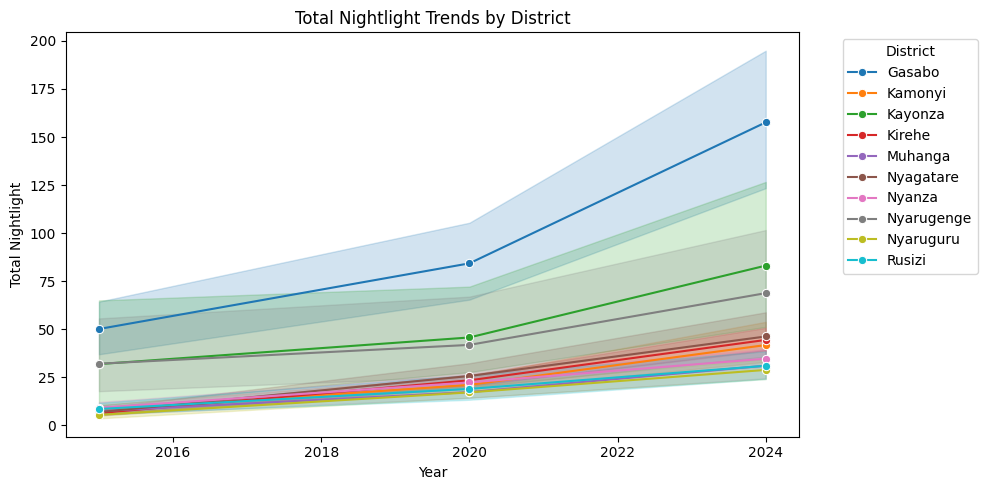

In [29]:
#concatenate the two dataframes to get the top 5 and lowest 5 districts with highest and lowest nightlight change respectively
final_districts = pd.concat([district_with_high_nightlight_change, district_with_lowest_nightlight_change]).reset_index(drop=True)
final_districts
# Filter merged_df for the selected districts and keep nigh480.762219	tlight data for each year
district_names = final_districts['district_name'].unique()
district_nightlight_trends = merged_df[
    merged_df['district_name'].isin(district_names)
][['district_name', 'year', 'total_nightlight']]

district_nightlight_trends = district_nightlight_trends.sort_values(['district_name', 'year'])
display(district_nightlight_trends)

# Visualization for each nightlight column
nightlight_cols = ['total_nightlight']
for col in nightlight_cols:
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=district_nightlight_trends,
        x='year',
        y=col,
        hue='district_name',
        marker='o'
    )
    plt.title(f'{col.replace("_", " ").title()} Trends by District')
    plt.xlabel('Year')
    plt.ylabel(col.replace("_", " ").title())
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## PART C: Modeling

In [30]:
#compute the population_density variable
merged_df['population_density']=merged_df['general_2020']/merged_df['pixel_count']

In [31]:
#build a multivariate regression model to predict the population_density using merged_df columns as features
# Define features and target variable
features = merged_df[['elderly_60_plus_2020', 'general_2020', 'children_under_five_2020',
       'youth_15_24_2020', 'building_count',
       'working_age_population', 'people_per_building', 'dependency_ratio',
       'infrastructure_index','total_nightlight', 'median_nightlight', 'max_nightlight',
       'std_nightlight', 'pixel_count', 'lit_pixel_count',
       'lit_pixel_percentage']]
y = merged_df['population_density']

# Add an intercept
X = sm.add_constant(features)
# Build the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())
print("\n")
# Get absolute value of coefficients (excluding the intercept)
importance = model.params.drop('const').abs().sort_values(ascending=False).head(3)
print("Most important features (by absolute coefficient):")
display(importance)





                            OLS Regression Results                            
Dep. Variable:     population_density   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1007.
Date:                Mon, 01 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:03:26   Log-Likelihood:                -36194.
No. Observations:                6507   AIC:                         7.242e+04
Df Residuals:                    6492   BIC:                         7.252e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

std_nightlight          38.293924
people_per_building     10.782965
infrastructure_index     8.474202
dtype: float64